In [1]:
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SAMPLE_RATE = 44100
# SAMPLE_RATE = 16000

# 데이터

In [2]:
wav_dict = {
            '아니요' : 0,
            '네' : 1
            }

In [3]:
wav_files = []

for file in os.listdir(f'./record_yes_no_raw (copy)/'):
    wav_files.append(f'./record_yes_no_raw (copy)/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[0])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no_raw (copy)/아니요_67.wav,아니요
1,./record_yes_no_raw (copy)/아니요_23_minus.wav,아니요
2,./record_yes_no_raw (copy)/네_59_reverse.wav,네
3,./record_yes_no_raw (copy)/아니요_67_minus.wav,아니요
4,./record_yes_no_raw (copy)/아니요_5.wav,아니요
...,...,...
1177,./record_yes_no_raw (copy)/네_34_strech.wav,네
1178,./record_yes_no_raw (copy)/아니요_95_strech.wav,아니요
1179,./record_yes_no_raw (copy)/네_44_shifting.wav,네
1180,./record_yes_no_raw (copy)/아니요_74_noise.wav,아니요


In [4]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,./record_yes_no_raw (copy)/아니요_67.wav,아니요,0
1,./record_yes_no_raw (copy)/아니요_23_minus.wav,아니요,0
2,./record_yes_no_raw (copy)/네_59_reverse.wav,네,1
3,./record_yes_no_raw (copy)/아니요_67_minus.wav,아니요,0
4,./record_yes_no_raw (copy)/아니요_5.wav,아니요,0
...,...,...,...
1177,./record_yes_no_raw (copy)/네_34_strech.wav,네,1
1178,./record_yes_no_raw (copy)/아니요_95_strech.wav,아니요,0
1179,./record_yes_no_raw (copy)/네_44_shifting.wav,네,1
1180,./record_yes_no_raw (copy)/아니요_74_noise.wav,아니요,0


In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(wav_df,
                                        test_size=0.1,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [7]:
train_data, val_data = train_test_split(train_data,
                                        test_size=0.2,
                                        stratify=train_data['class_label'],
                                        random_state=7)

In [8]:
len(train_data), len(val_data), len(test_data)

(850, 213, 119)

In [9]:
X_train = train_data['path']
y_train = train_data['class_label']

In [10]:
X_val = val_data['path']
y_val = val_data['class_label']

In [11]:
X_test = test_data['path']
y_test = test_data['class_label']

In [12]:
def get_mfcc(path):
    b, _ = librosa.core.load(path, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
        return pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
    except:
        print('bad file')
        return pd.Series([0]*40)

In [13]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = get_mfcc(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[0.00403055 0.0051713  0.00585666 ... 0.00086645 0.00069392 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-9.4620339e-07 -8.8328994e-07  1.6641712e-07 ... -4.0876772e-04
 -6.2995485e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-0.00010295 -0.00062821 -0.00109471 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[0.00310246 0.00356936 0.00349035 ... 0.00259751 0

In [14]:
features_df

,feature,class_label
0,0 -490.316467 1 145.541122 2 30.79...,0
1,0 -481.516479 1 104.020927 2 15.84...,1
2,0 -537.161011 1 127.285942 2 23.96...,1
3,0 -466.706238 1 116.039879 2 34.55...,0
4,0 -363.623474 1 146.514221 2 -59.79...,0
...,...,...
845,0 -534.941467 1 155.470932 2 17.08...,1
846,0 -591.464783 1 141.659042 2 -1.22...,0
847,0 -460.987305 1 123.062965 2 13.95...,1
848,0 -576.616821 1 109.093628 2 -15.23...,0


In [15]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = get_mfcc(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[ 7.7002805e-06 -2.3918321e-05 -9.4470837e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-6.5897424e-03 -4.4337283e-03 -2.1341625e-04 ... -9.1137874e-05
  8.9087238e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-1.1999542e-04 -1.9803185e-04 -2.7983714e-04 ... -1.6383163e-04
 -5.6276796e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y

In [16]:
features_val_df

,feature,class_label
0,0 -549.524292 1 133.965225 2 10.70...,1
1,0 -373.799438 1 154.024323 2 -64.65...,1
2,0 -479.967865 1 111.123344 2 30.80...,1
3,0 -478.216278 1 168.384171 2 16.44...,0
4,0 -510.483337 1 184.836395 2 6.18...,1
...,...,...
208,0 -477.749695 1 197.143723 2 35.50...,0
209,0 -370.306274 1 153.505936 2 -79.03...,1
210,0 -529.600464 1 141.111908 2 3.42...,1
211,0 -593.517822 1 116.027565 2 -10.10...,0


In [17]:
features_test = []

for i, wav in enumerate(X_test):
    mfccs = get_mfcc(wav)
    features_test.append([mfccs, y_test.values[i]])#, y_val[i]])

features_test_df = pd.DataFrame(features_test, columns=['feature', 'class_label'])

/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00094567 -0.00150637
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-0.01851763 -0.02091425 -0.01943504 ... -0.02024131 -0.01307508
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[-0.00385381 -0.00258106 -0.00085191 ... -0.00011017 -0.00325206
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)
/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.

In [18]:
features_test_df

,feature,class_label
0,0 -412.565643 1 126.713547 2 26.54...,0
1,0 -413.007782 1 116.655922 2 30.48...,0
2,0 -347.585663 1 136.466995 2 -56.93...,1
3,0 -459.257812 1 152.043579 2 7.51...,1
4,0 -461.248230 1 106.882301 2 38.18...,0
...,...,...
114,0 -510.496796 1 184.828949 2 6.18...,1
115,0 -490.944489 1 110.145302 2 29.29...,1
116,0 -474.899719 1 140.441833 2 9.91...,1
117,0 -308.428223 1 133.841690 2 -35.34...,0


In [19]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [20]:
X_train.shape

(850, 80)

In [21]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [22]:
X_val.shape

(213, 80)

In [23]:
X_test = np.array(features_test_df.feature.tolist())
y_test = np.array(features_test_df.class_label.tolist())

In [24]:
X_test.shape

(119, 80)

# 모델

In [25]:
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#fitting RandomForest on the dataset
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)

#checking the accuracy of the model
print(rfc.score(X_test, y_test))

0.9663865546218487


In [26]:
predicted = rfc.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'accuracy score: {accuracy:.3}')

accuracy score: 0.966


In [27]:
rfc.predict_proba(X_test)

array([[0.95333333, 0.04666667],
       [0.89333333, 0.10666667],
       [0.22      , 0.78      ],
       [0.        , 1.        ],
       [0.92      , 0.08      ],
       [0.98666667, 0.01333333],
       [0.02      , 0.98      ],
       [0.98      , 0.02      ],
       [0.10666667, 0.89333333],
       [0.98666667, 0.01333333],
       [0.02      , 0.98      ],
       [0.02666667, 0.97333333],
       [0.92666667, 0.07333333],
       [0.98      , 0.02      ],
       [0.01333333, 0.98666667],
       [0.97333333, 0.02666667],
       [0.96      , 0.04      ],
       [0.91333333, 0.08666667],
       [0.02      , 0.98      ],
       [0.71333333, 0.28666667],
       [0.96666667, 0.03333333],
       [0.1       , 0.9       ],
       [1.        , 0.        ],
       [0.13333333, 0.86666667],
       [0.95333333, 0.04666667],
       [0.2       , 0.8       ],
       [0.00666667, 0.99333333],
       [0.02666667, 0.97333333],
       [0.00666667, 0.99333333],
       [0.96666667, 0.03333333],
       [0.

<AxesSubplot: >

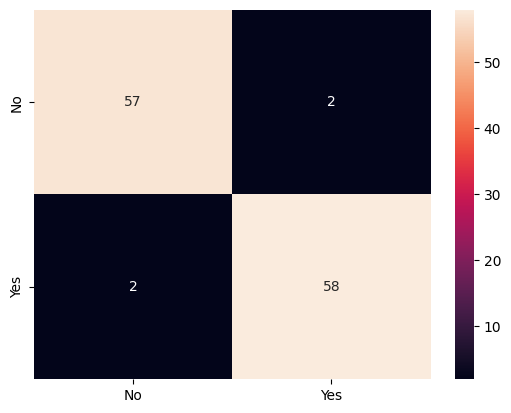

In [28]:
# cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=wav_dict.keys(), index=wav_dict.keys())
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(cm, annot=True)

In [29]:
# GradientBoostingClassifier 

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                         max_depth=5, random_state=0).fit(X_train, y_train)

# XGBClassifier
clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9831932773109243

<AxesSubplot: >

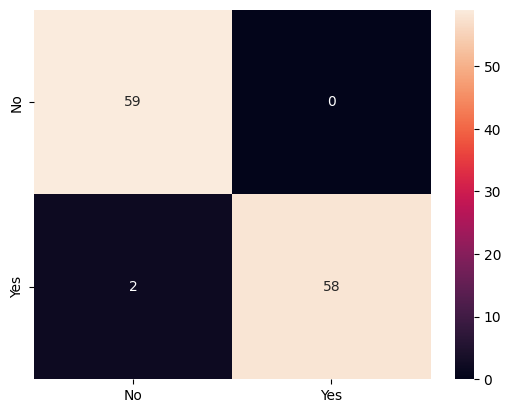

In [30]:
predicted = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['No', 'Yes'], index=['No', 'Yes'])
sns.heatmap(cm, annot=True)

In [31]:
clf.predict_proba(X_test)

array([[9.9856669e-01, 1.4332844e-03],
       [9.8251826e-01, 1.7481763e-02],
       [1.9649386e-02, 9.8035061e-01],
       [7.6961517e-04, 9.9923038e-01],
       [9.9143595e-01, 8.5640782e-03],
       [9.9990141e-01, 9.8579243e-05],
       [8.0400705e-04, 9.9919599e-01],
       [9.9890947e-01, 1.0905453e-03],
       [9.7835064e-03, 9.9021649e-01],
       [9.9730438e-01, 2.6956073e-03],
       [7.6493621e-03, 9.9235064e-01],
       [7.8201294e-04, 9.9921799e-01],
       [9.9073309e-01, 9.2669362e-03],
       [9.9469304e-01, 5.3069596e-03],
       [1.1612773e-03, 9.9883872e-01],
       [9.9978489e-01, 2.1511651e-04],
       [9.9632329e-01, 3.6766902e-03],
       [9.9836749e-01, 1.6325334e-03],
       [3.2230020e-03, 9.9677700e-01],
       [9.7681612e-01, 2.3183871e-02],
       [9.9465322e-01, 5.3468002e-03],
       [1.9538522e-02, 9.8046148e-01],
       [9.9963278e-01, 3.6725137e-04],
       [4.9853325e-04, 9.9950147e-01],
       [9.9546754e-01, 4.5324424e-03],
       [6.9153309e-03, 9.

# 음성인식

In [32]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [33]:
reverse_dict

{0: '아니요', 1: '네'}

In [50]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = SAMPLE_RATE  # Sample rate
duration = 5  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
#recording = recording.flatten()
print(recording.shape)


# Extract MFCCs from microphone recording
listen = []
gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)
mfccs =  pd.Series(np.hstack((np.mean(gmm, axis=1), np.std(gmm, axis=1))))
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)

# Use MFCCs as input to your models
# prediction = rfc.predict_proba(X_listen)   # RandomForest
prediction = clf.predict_proba(X_listen)  # XGBoost

print(prediction)
print(reverse_dict[np.argmax(prediction)])


recording...
(220500, 1)


/tmp/ipykernel_161507/2057302730.py:17: FutureWarning: Pass y=[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [-0.00384521]
 [-0.00283813]
 [-0.00357056]] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(recording, sr = SAMPLE_RATE, n_mfcc=40)
/home/s/venv/tensorflow/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1
  return f(*args, **kwargs)


## pyaudio

In [67]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 16000 #SAMPLE_RATE

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 5

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

listen = []
mfccs = get_mfcc("./output.wav")
listen.append([mfccs])
listen_df = pd.DataFrame(listen, columns=['feature'])

X_listen = np.array(listen_df.feature.tolist())
print(X_listen.shape)

# # Use MFCCs as input to your rfc model
# prediction = rfc.predict_proba(X_listen)
prediction = clf.predict_proba(X_listen)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2642:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:869:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_oss.c:377:(_snd_pcm_oss_open) Unknown field port
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card
ALSA lib pcm_usb_stream.c:486:(_snd_pcm_usb_stream_open) Invalid type for card


start recording...
recording stopped
(1, 80)
[[0.9822539 0.0177461]]
아니요


/tmp/ipykernel_2923/1176896864.py:5: FutureWarning: Pass y=[ 2.6115632e-07  4.1075147e-08 -2.5259678e-07 ... -5.0758865e-02
 -2.7430817e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  gmm = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=40)


In [40]:
!pip3 install pyaudio

  Using cached PyAudio-0.2.13.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.13-cp38-cp38-linux_x86_64.whl size=69720 sha256=31e36da860660723a3321c0db673c44cd96ce6f46db30c48c4ffc3d6be83814f
  Stored in directory: /home/s/.cache/pip/wheels/15/40/51/69f145b695516672774fed0512fda1bd8abf6ea41b6494946d
Successfully built pyaudio


In [46]:
import matplotlib.pyplot as plt
import librosa.display

def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title('sound_bad_1.wav')
    librosa.display.waveshow(data, sr = librosa_sample_rate)

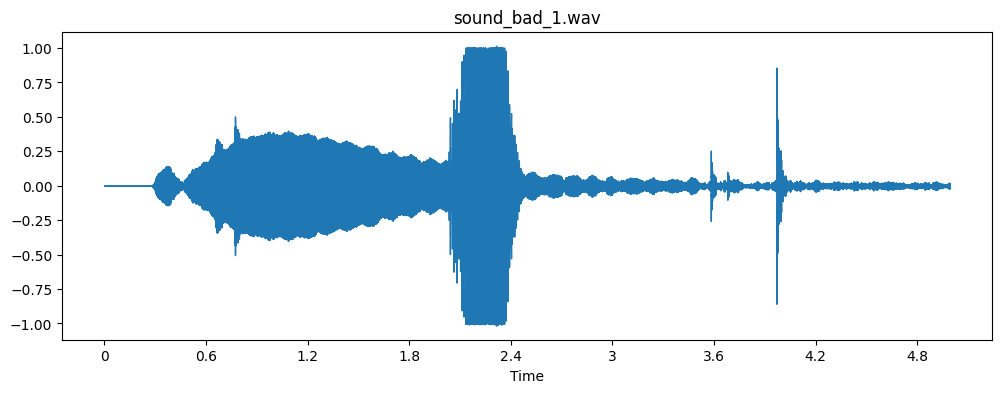

In [57]:
draw_sound('./output.wav')

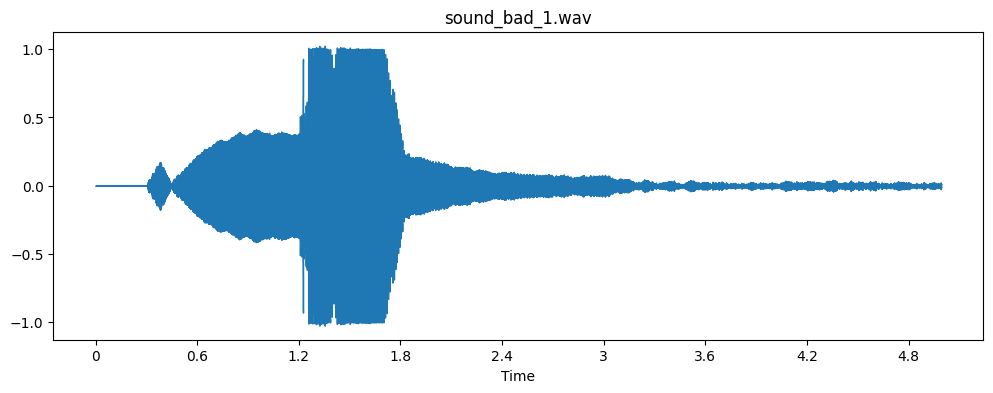

In [59]:
draw_sound('./output.wav')

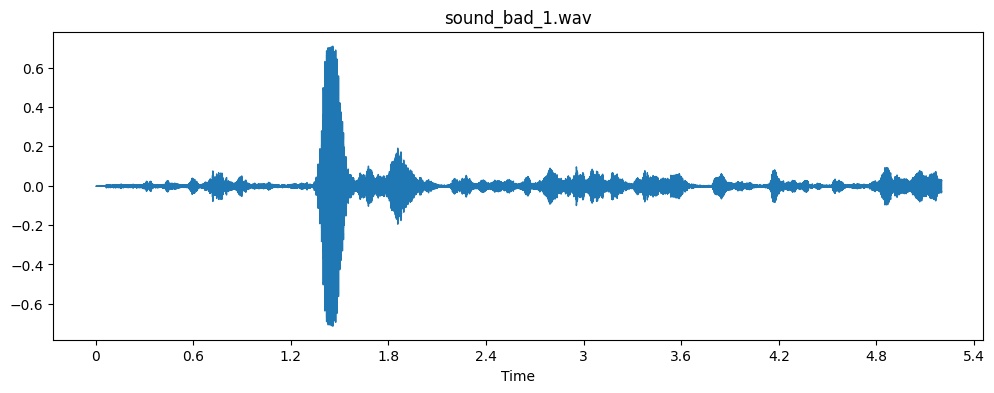

In [60]:
draw_sound('./record_yes_no/네_3.wav')

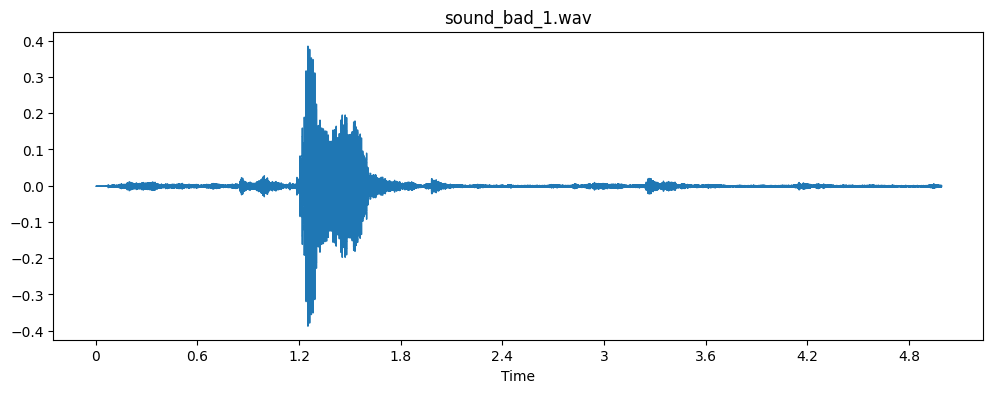

In [55]:
draw_sound('./record_yes_no/아니요_3.wav')

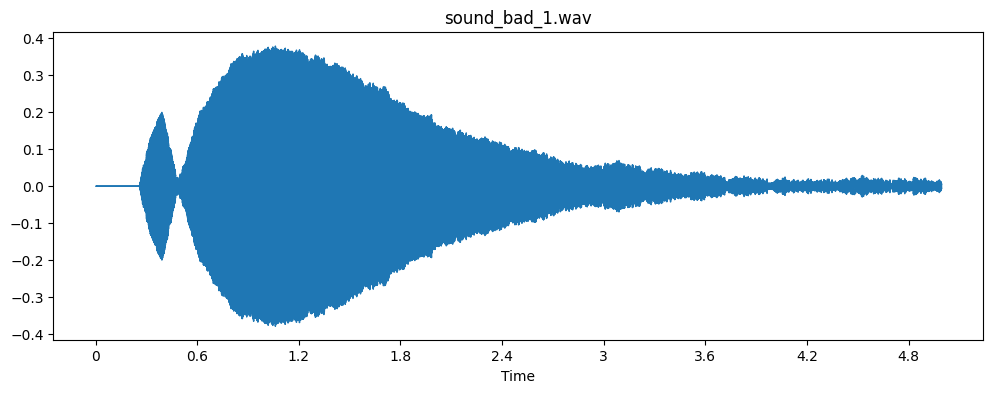

In [66]:
draw_sound('./output.wav')

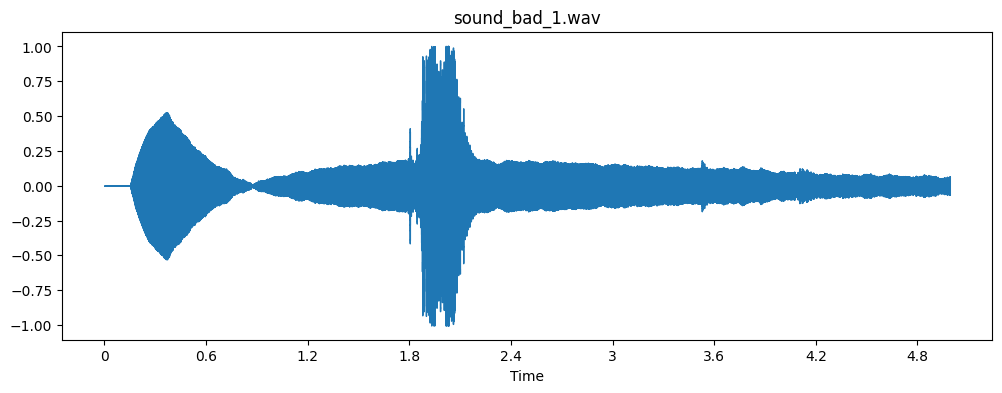

In [68]:
draw_sound('./output.wav')